In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [73]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

### pca using sklearn

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x_standardized = StandardScaler().fit_transform(X)

skl_pca = PCA(n_components=2)

sk_pca = skl_pca.fit_transform(x_standardized)

print(sk_pca.shape)

(150, 2)


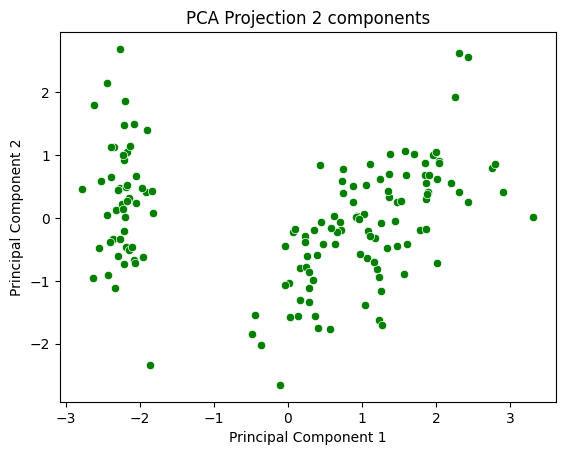

In [109]:
sns.scatterplot(x=sk_pca[:,0],y=sk_pca[:,1], color='Green')
plt.title("PCA Projection 2 components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

###PCA from scratch

Steps to Calculate PCA

1. Standardize the Data

2. Compute the Covariance Matrix

3. Calculate Eigenvalues and Eigenvectors

4. Sort Eigenvalues in Descending Order

5. Reorder Eigenvectors According to Sorted Indices

6. Project Data onto Principal Components

In [100]:
class PCA:

  def __init__(self, n_components):
    self.n_components = n_components
    self.mean = None
    self.std_dev = None
    self.components = None

  def fit(self, X):
    self.mean= np.mean(X, axis=0)
    self.std_dev = np.std(X, axis=0)
    x_standardized = ( X - self.mean ) / self.std_dev

    cov = np.cov(x_standardized.T)

    eigenvalues, eigenvector = np.linalg.eig(cov)
    sort_idx = np.argsort(eigenvalues)[::-1]
    self.components = eigenvector[:,sort_idx ][:,:self.n_components]

  def transform(self, X):
    x_standardized = ( X - self.mean ) / self.std_dev
    return np.dot(x_standardized, self.components)

  def fit_transform(self, X):
    self.fit(X)
    return self.transform(X)

In [103]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [105]:
X_pca.shape

(150, 2)

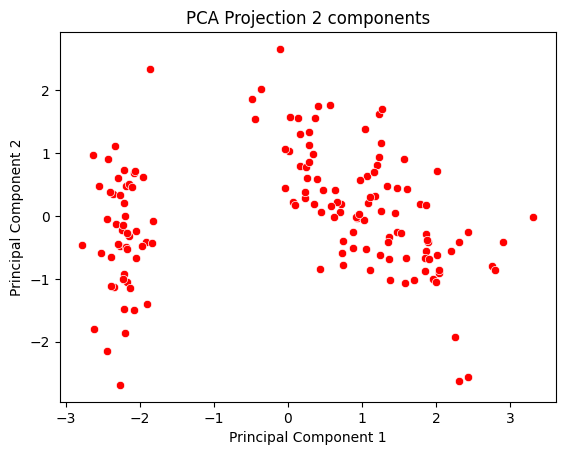

In [111]:
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1], color='Red')
plt.title("PCA Projection 2 components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## Plotting of Principal components, implementation using both sklearn and numpy

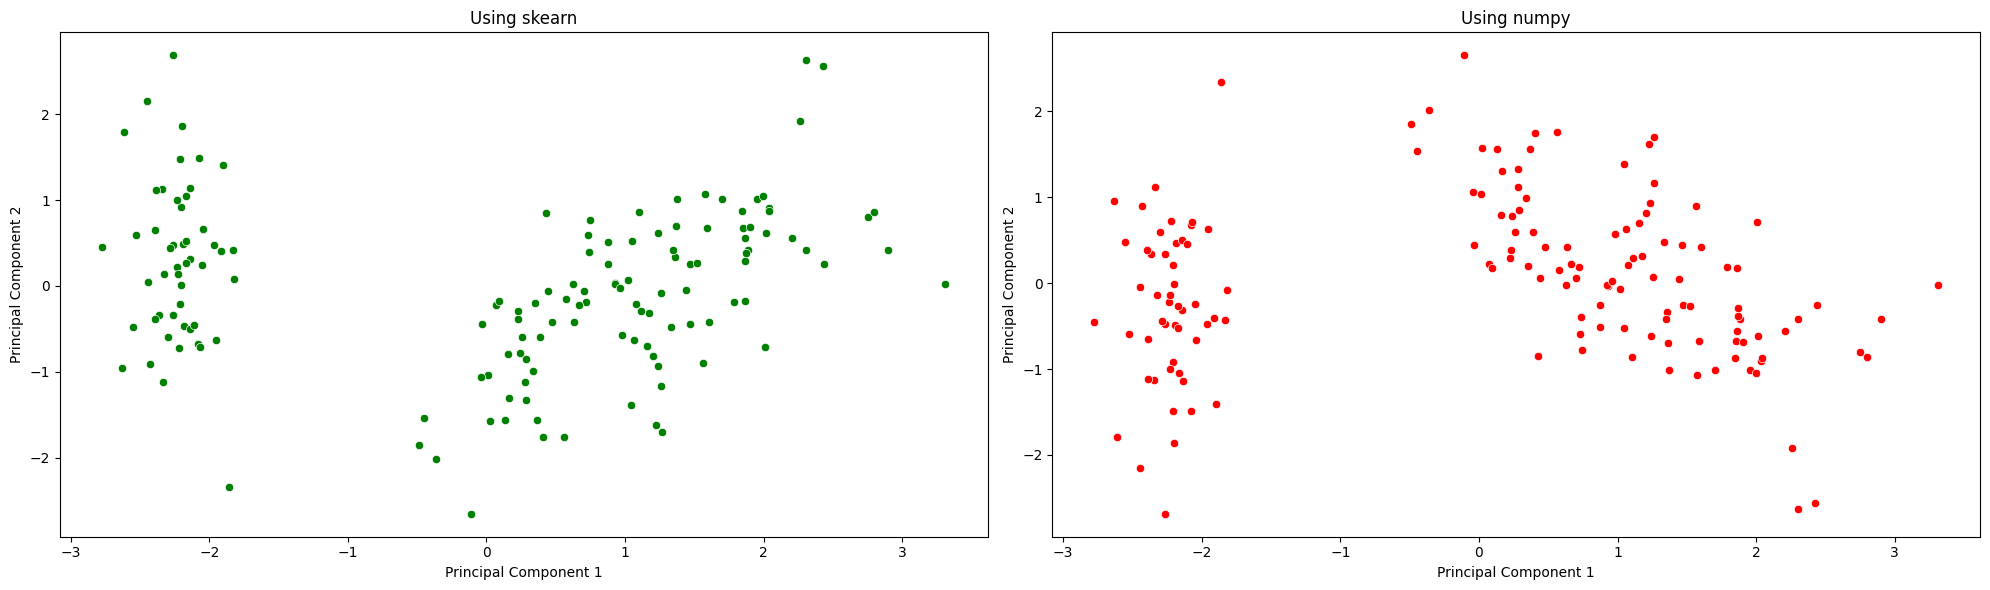

In [119]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.scatterplot(x=sk_pca[:,0],y=sk_pca[:,1], color='Green')
plt.title("Using skearn")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1], color='Red')
plt.title("Using numpy")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()
